In [1]:
from scipy.misc import imread, imresize
from utils import BatchGenerator
import numpy as np

import matplotlib.pyplot as plt
import random

%matplotlib inline

(600, 800, 3)
off_set=131
(600, 600, 3)


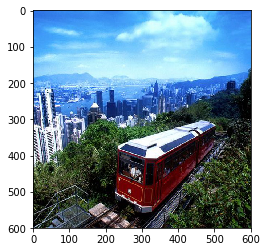

In [2]:
ex_path = 'images/hongkong.jpg'
img = imread(ex_path, mode='RGB')
print(img.shape)

shape = img.shape[:2]
if shape[0]==shape[1]:
    pass
else:
    short_axis = np.argmin(shape)
    short_edge = shape[short_axis]
    # long_edge = shape[np.argmax(shape)]
    
    off_set = abs(shape[0]-shape[1])
    off_set = random.randint(0, off_set)
    print("off_set={}".format(off_set))
    
    if short_axis == 0:
        img = img[:,off_set:off_set+short_edge]
    else:
        img = img[off_set:off_set+short_edge, :]

    
print(img.shape)        
plt.imshow(img)

## Resize only

In [3]:
%%time
COCOgenerator = BatchGenerator('data/COCO/train2014/',
                               reshape_mode='resize',
                               target_size=(256,256),
                               color_mode='rgb',
                               batch_size=32,
                               shuffle=True)

Found 82783 images
CPU times: user 1.84 s, sys: 160 ms, total: 2 s
Wall time: 1.98 s


In [4]:
for it, batch in enumerate(COCOgenerator):
    print(batch.shape)
    if it>4:
        break

(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)
(32, 256, 256, 3)


In [5]:
%%timeit -n 30
x = COCOgenerator.next()

335 ms ± 7.04 ms per loop (mean ± std. dev. of 7 runs, 30 loops each)


(32, 256, 256, 3)


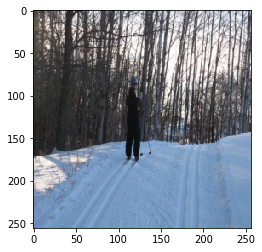

In [6]:
x = COCOgenerator.next()
print(x.shape)
plt.imshow(x[0])
plt.imshow(np.clip(x[0], 0, 255).astype('uint8'))

## Crop + Resize 

In [7]:
%%time
COCOgenerator = BatchGenerator('data/COCO/train2014/',
                               reshape_mode='crop',
                               target_size=(256,256),
                               color_mode='rgb',
                               batch_size=32,
                               shuffle=True)

Found 82783 images
CPU times: user 1.87 s, sys: 136 ms, total: 2 s
Wall time: 1.97 s


In [8]:
%%timeit -n 30
x = COCOgenerator.next()

433 ms ± 21.1 ms per loop (mean ± std. dev. of 7 runs, 30 loops each)


## Comparison to Keras `flow_from_directory`

In [9]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.0.6


In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
%%time

COCOgenerator = ImageDataGenerator().flow_from_directory('data/COCO/',
                                                         target_size=(256,256),
                                                         color_mode='rgb',
                                                         batch_size=32,
                                                         shuffle=True,
                                                         class_mode=None)

Found 82783 images belonging to 1 classes.
CPU times: user 1.95 s, sys: 152 ms, total: 2.1 s
Wall time: 2.19 s


In [12]:
%%timeit -n 30
x = COCOgenerator.next()

1.37 s ± 37.9 ms per loop (mean ± std. dev. of 7 runs, 30 loops each)
